# Resignation prediction using machine learning algorithms

by A. Zayer
## 1. Introduction

Employees retention, especially in large companies, is and still will be a hot topic. Considerable amounts of money and time are spent during the hiring and the training process,therefore, the ability to uderstand and forecast future resignations is of prime interest since this, could help decision makers and hiring managers to prevent such situations from appearing by taking the appropriate measures. 

An exploratory-predictive analysis will be carried out in order to understand what impels employees to resign. The kaggle dataset released under the CC BY-SA 4.0 License is used for this purpose. The dataset has 14999 rows and 9 columns with the following names:

<pre>
|Satisfaction_level   | Level of satisfaction (0-1)|
|Last_evaluation      | Evaluation of employee performance (0-1)|
|Number_project       | Number of projects completed while at work|
|Average_monthly_hours| Average monthly hours at workplace|
|Time_spend_company   | Number of years spent in the company|
|Work_accident        | Whether the employee had a workplace accident|
|Left                 | Whether the employee left the workplace or not (1 or 0) Factor|
|Promotion_last_5years| Whether the employee was promoted in the last five years|
|Departments          | Department in which they work for|
|Salary               | Relative level of salary (low med high)|
</pre>

## 2. Preprocessing


#### 2.1 Import libraries

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from palettable import colorbrewer as cb 
from IPython.display import display
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
themes = get_themes()
set_nb_theme(themes[0])
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5,'figure.figsize': (12, 9)})
pd.set_option('display.float_format', lambda x: '%.2f' % x)


### 2.2 Data Preprocessing

The csv data file is loaded to the memory as a pandas dataframe.

In [2]:
df = pd.read_csv('./data/hr.csv',sep=";") #Import data

In [3]:
df.shape # check how many rows and columns in the data

(14999, 10)

Let's have a quick look at the first rows

In [4]:
df.head(10)

,Satisfaction_level,Last_evaluation,Number_project,Average_montly_hours,Time_spend_company,Work_accident,Left,Promotion_last_5years,Departments,Salary
0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,0.37,0.52,2,159,3,0,1,0,Sales,Low
5,0.41,0.50,2,153,3,0,1,0,Sales,Low
6,0.10,0.77,6,247,4,0,1,0,Sales,Low
7,0.92,0.85,5,259,5,0,1,0,Sales,Low
8,0.89,1.00,5,224,5,0,1,0,Sales,Low
9,0.42,0.53,2,142,3,0,1,0,Sales,Low


and the last rows

In [5]:
df.tail(10)

,Satisfaction_level,Last_evaluation,Number_project,Average_montly_hours,Time_spend_company,Work_accident,Left,Promotion_last_5years,Departments,Salary
14989,0.43,0.57,2,159,3,1,1,0,Technical,Low
14990,0.89,0.88,5,228,5,1,1,0,Support,Low
14991,0.09,0.81,6,257,4,0,1,0,Support,Low
14992,0.40,0.48,2,155,3,0,1,0,Support,Low
14993,0.76,0.83,6,293,6,0,1,0,Support,Low
14994,0.40,0.57,2,151,3,0,1,0,Support,Low
14995,0.37,0.48,2,160,3,0,1,0,Support,Low
14996,0.37,0.53,2,143,3,0,1,0,Support,Low
14997,0.11,0.96,6,280,4,0,1,0,Support,Low
14998,0.37,0.52,2,158,3,0,1,0,Support,Low


Rows can be seen as instances of a class called employees, wehere columns represent attributes.

In [6]:
for key in (df.columns.values):
    print(key)

Satisfaction_level
Last_evaluation
Number_project
Average_montly_hours
Time_spend_company
Work_accident
Left
Promotion_last_5years
Departments
Salary


Data is a mixture of numerical and categorical values.
The column 'Departments' is a nominal variable with the following categories:

In [7]:
print(df.Departments.value_counts())

Sales          4140
Technical      2720
Support        2229
IT             1227
Product_mng     902
Marketing       858
R&D             787
Accounting      767
HR              739
Management      630
Name: Departments, dtype: int64


The 'Salary' variable has 3 ordinal categories

In [8]:
print(df.Salary.value_counts())

Low       7316
Medium    6446
High      1237
Name: Salary, dtype: int64


Tha salary and departments columns need to be encoded in integer numbers in order to be handled with learning algorithms, which will be done in the predictive section of this study. We have also two binary variables namely 'Left' and 'Promotion_last_5years'

In [9]:
print(df['Left'].value_counts()) #check the occurence od the binary values

0    11428
1     3571
Name: Left, dtype: int64


In [10]:
print(df['Promotion_last_5years'].value_counts()) #check the occurence of the binary values

0    14680
1      319
Name: Promotion_last_5years, dtype: int64


 Check for missing or incomplete data

In [11]:
np.count_nonzero(df.isnull()) 

0

## 3. Exploratory analysis

### 3.1 Summary statistics of the numerical features:

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction_level,14999.00,0.61,0.25,0.09,0.44,0.64,0.82,1.00
Last_evaluation,14999.00,0.72,0.17,0.36,0.56,0.72,0.87,1.00
Number_project,14999.00,3.80,1.23,2.00,3.00,4.00,5.00,7.00
Average_montly_hours,14999.00,201.05,49.94,96.00,156.00,200.00,245.00,310.00
Time_spend_company,14999.00,3.50,1.46,2.00,3.00,3.00,4.00,10.00
Work_accident,14999.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
Left,14999.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00
Promotion_last_5years,14999.00,0.02,0.14,0.00,0.00,0.00,0.00,1.00


The average monthly hours is around 200 hours/month, which is about 10 hours/day, assuming five business days per week.

In the past five years, around 24% of the employees left the company. This number is quit alarming and raises questions about the tenure policy of the company.

The'satisfaction level' and 'last evaluation' averages are 0.61 and 0.72 respectively. Although these variables are not always objective but considering that we have a large dataset, the noise associated with each employee judgment should be minimal when averaging over large numbers.

The average employees’ life cycle is about 3.5 years which means an average employee may complete this loop more than 15 times in his career if he keeps looking for work in companies similar to this one.

##  3.2 Data visualisation

In [13]:
colors = cb.qualitative.Set3_12.hex_colors
colors1=cb.qualitative.Paired_11.hex_colors
colorz=['#EA8E83','#FFFFB3','#B3DE69','#FDB462']
colorz2=['#96B68D','#807885','#D1D3D4','#C7B5A7','#B5C2C9','#F2CF9A','#C58083']
colorz3=['#F6D3E5','#EA8E83']
labelz =["Satisfaction level","Last evaluation","Number of projects","Average monthly hours",
         "Time spent company","Work accident","Left","Promotion last 5 years"]
left_labels =["Stayers","Leavers"]
salez = ["Satisfaction level",
        "Last evaluation",
        "Number of projects",
        "Average monthly hours",
        "Time spent company",
        "Work accident" ,
        "Left",
        "Promotion last 5 years",
        "Departments",
        "Salary"]      

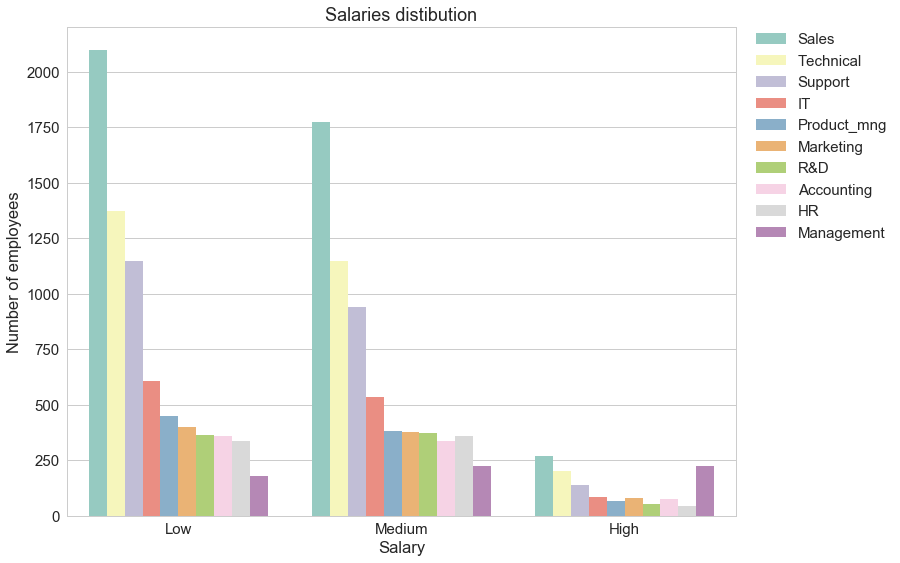

In [14]:
ax = sns.countplot(
        x='Salary',
        data=df,
        hue='Departments',
        hue_order=df['Departments'].value_counts().index,
        palette= colors)
_ = ax.set_xlabel('Salary')
_ = ax.set_ylabel('Number of employees')
_ = ax.set_title('Salaries distibution')
_ = plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.)



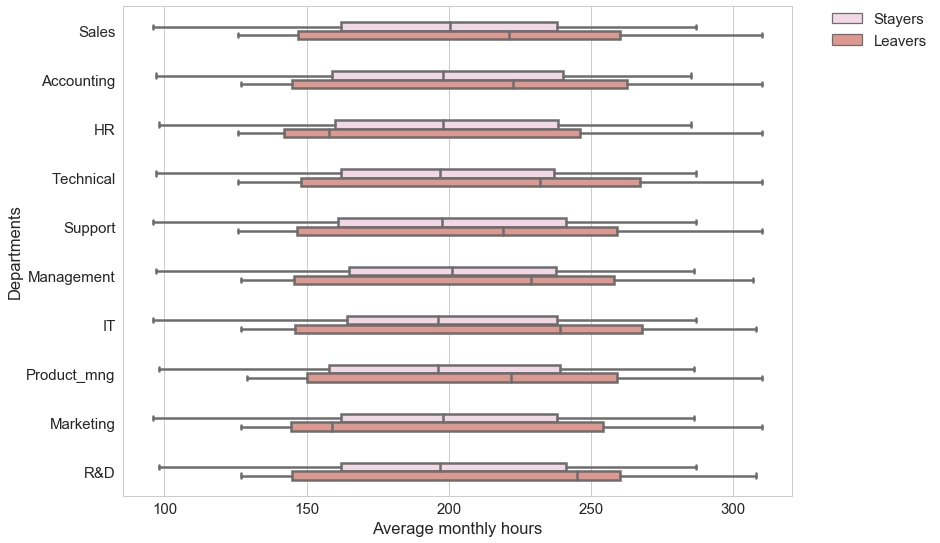

In [15]:

ax = sns.boxplot(
        y='Departments',#Column to split upon
        x='Average_montly_hours',# Column to plot
        data=df,
        hue='Left',
        width=0.35,
        fliersize=5,
        palette=colorz3,
      
        flierprops={
            'marker': '.'})
_ = ax.set_xlabel('Average monthly hours')
_ = ax.set_ylabel('Departments')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], left_labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Overworked employees tend to leave

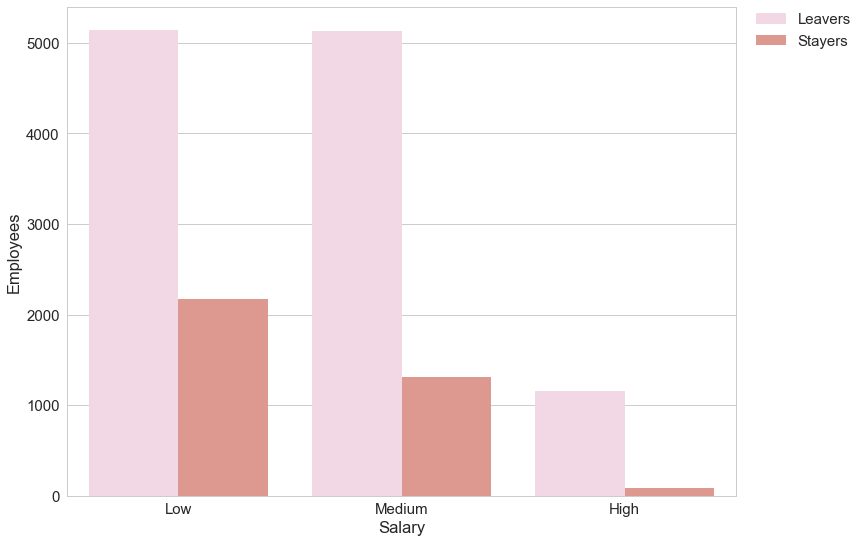

In [16]:
ax = sns.countplot(
        x='Salary',
        hue='Left',
        data=df,
        palette=colorz3)
_ = ax.set_xlabel('Salary')
_ = ax.set_ylabel('Employees')

_ = plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.,labels={"Stayers","Leavers"})


especially if they are not well paid

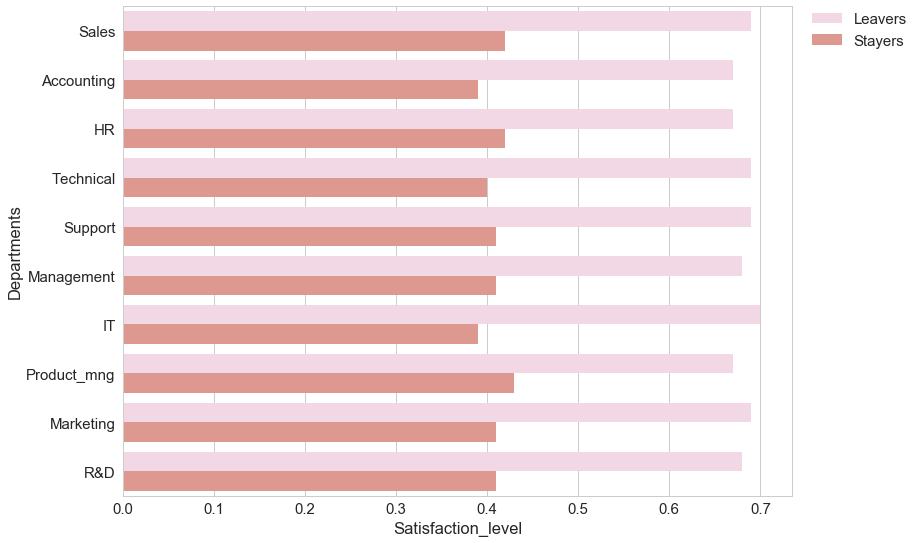

In [17]:
# satisfaction level among the leavers and the Stayers in different departments
from numpy import median
ax = sns.barplot(
        y='Departments',
        x='Satisfaction_level',
        data=df,
        ci=None,
        hue='Left',       
        estimator=median,
        palette=colorz3)        
_ = ax.set_ylabel('Departments')
_ = ax.set_xlabel('Satisfaction_level')
_ = plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.,labels={"Stayers","Leavers"})



and yes they are not happy 

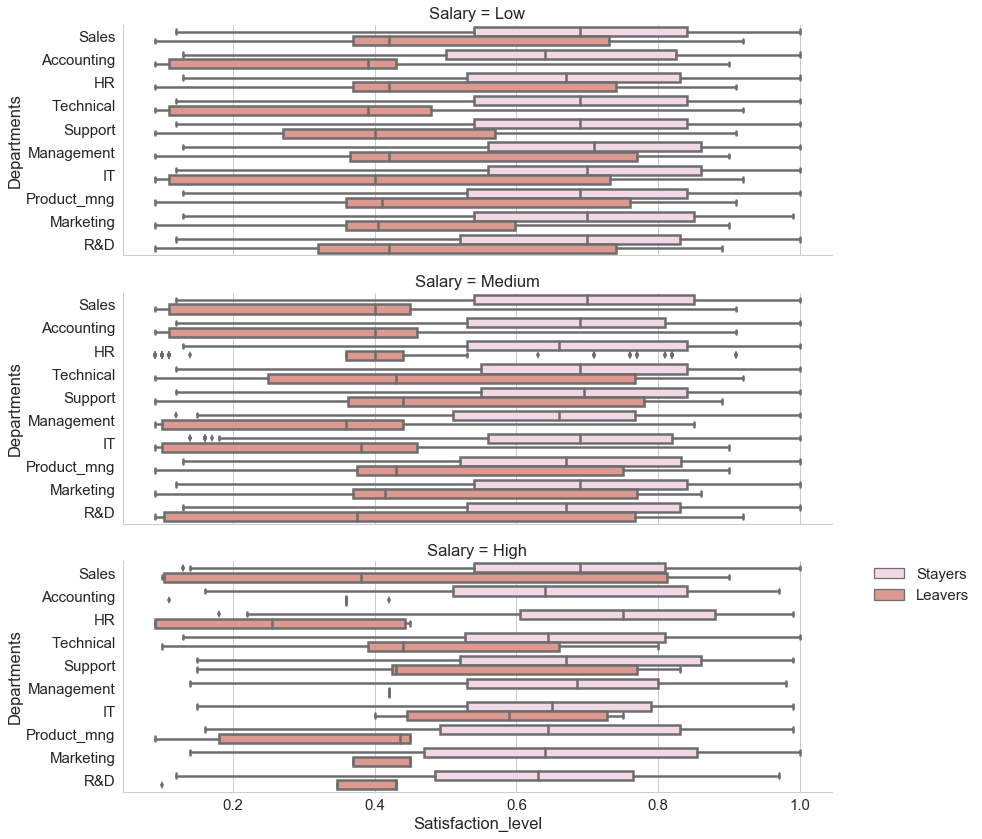

In [18]:

sns.factorplot(x="Satisfaction_level",
               y="Departments",
               hue="Left",
               row="Salary",
               data=df[df.Departments.notnull()],
               kind="box",
               aspect=3,
               palette=colorz3,
               legend=False);

l = plt.legend(handles[0:2], 
               left_labels[0:2], 
               bbox_to_anchor=(1.05, 1), 
               loc=2, 
               borderaxespad=0.)


'Satisfaction level' is a strong indicator on whether an employee will leave or stay.

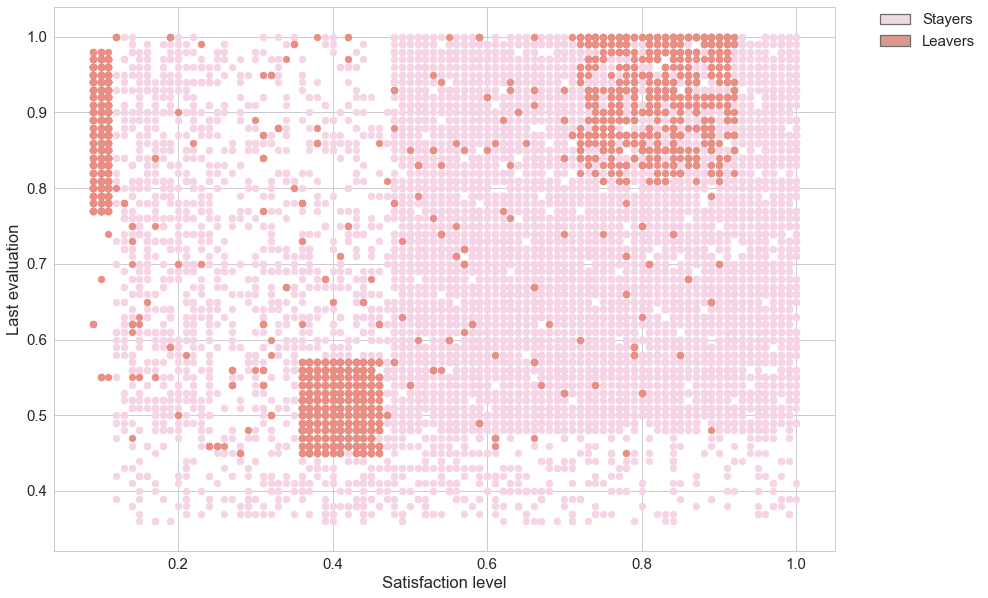

In [19]:
l_sat = df.loc[df["Left"] == 1]["Satisfaction_level"]
s_sat = df.loc[df["Left"] == 0]["Satisfaction_level"]

l_ev = df.loc[df["Left"] == 1]["Last_evaluation"]
s_ev = df.loc[df["Left"] == 0]["Last_evaluation"]

plt.figure(figsize=(14,10))
plt.xlabel("Satisfaction level")
plt.ylabel("Last evaluation")
scat_s = plt.scatter(s_sat, s_ev, color=colorz3[0])
scat_l = plt.scatter(l_sat, l_ev, color=colorz3[1])

l = plt.legend(handles[0:2], 
               left_labels[0:2], 
               bbox_to_anchor=(1.05, 1), 
               loc=2, 
               borderaxespad=0.)

The three separate clusters formed by leavers show that there is no guarantee that an employee will stay based on the sole fact that his superiors are happy with his work rate.

Employers and employees judge each other from different perspectives.
'Last evaluation' metric measures time, effort and work rate of the employees.
'Satisfaction level' metric on the other hand measures how fair the salary and benefits, if any, relative to the effort and time spent in the company.


![pic](img/diag.png)



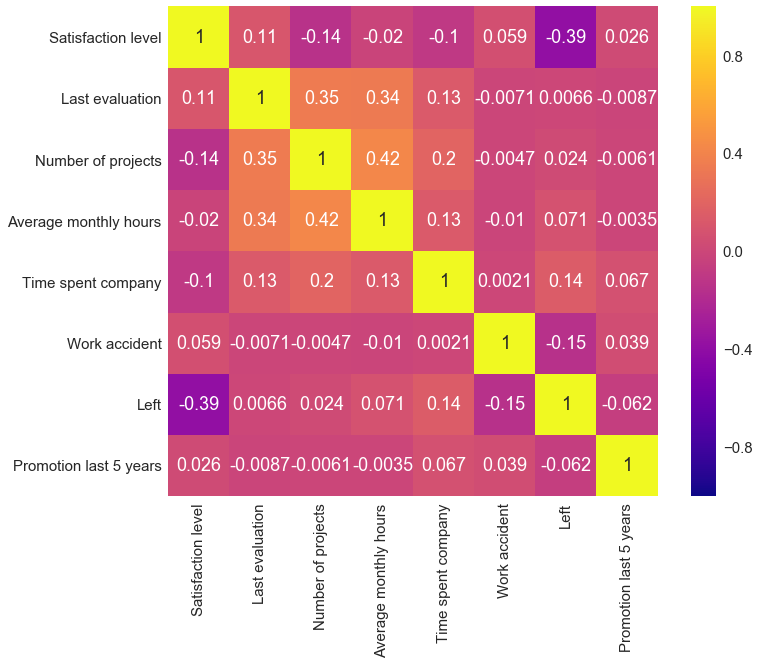

In [20]:
correlation = df.corr()
g=sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='plasma')
zz1=np.transpose(labelz)
zz2=np.transpose(labelz[::-1])
g.set(xticklabels=zz1);
g.set(yticklabels=zz2);

The correlation plot confirms the observations mentioned earlier. The 'last evaluation' metric is highly correlated to the 'average monthly hours' and the 'number of projects'. The more projects you take and the more hours you work the happier your boss is.

The 'Left' feature is correlated with 'Satisfaction Level', but in a negative way, the lower the satisfaction level, the higher the probability of leaving.


## 4. Predictive Analysis

Goal: Extraction and classification of main factors causing people to leave the company

### 4.1 Scale and Split the data

In [21]:
df.columns

Index(['Satisfaction_level', 'Last_evaluation', 'Number_project',
       'Average_montly_hours', 'Time_spend_company', 'Work_accident', 'Left',
       'Promotion_last_5years', 'Departments', 'Salary'],
      dtype='object')

In order to build the feature matrix., we have to convert categorical values into binaries which will create extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively.

In [22]:
df_clf = pd.get_dummies(df)
df_clf.head()

,Satisfaction_level,Last_evaluation,Number_project,Average_montly_hours,Time_spend_company,Work_accident,Left,Promotion_last_5years,Departments_Accounting,Departments_HR,...,Departments_Management,Departments_Marketing,Departments_Product_mng,Departments_R&D,Departments_Sales,Departments_Support,Departments_Technical,Salary_High,Salary_Low,Salary_Medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
labels =df_clf.columns
labels

Index(['Satisfaction_level', 'Last_evaluation', 'Number_project',
       'Average_montly_hours', 'Time_spend_company', 'Work_accident', 'Left',
       'Promotion_last_5years', 'Departments_Accounting', 'Departments_HR',
       'Departments_IT', 'Departments_Management', 'Departments_Marketing',
       'Departments_Product_mng', 'Departments_R&D', 'Departments_Sales',
       'Departments_Support', 'Departments_Technical', 'Salary_High',
       'Salary_Low', 'Salary_Medium'],
      dtype='object')

The 'Departments' and 'Salary' columns have been expanded into five and three separate columns respectively.

Create the features matrix X and the target vector y.

In [24]:
y = df_clf['Left'].values

df_clf = df_clf.drop(['Left'],axis=1)
X = df_clf.values

In [25]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

###  4.2 Create helpers

In [27]:
def separator():
    print(" ")
    print('*********************************************************************')
    print(" ")

In [28]:
# function to print classification metrics
def printz(predict_train,predict_test):
    
    print('Performance on Training Data')
    # Accuracy
    print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
    separator()
    
    print('Performance on Testing Data')
    # training metrics
    print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, predict_test)))
    print("Confusion Matrix")
    separator()
    
    print('Metrics')
    # Note the use of labels for set 1=True to upper left and 0=False to lower right
    print("{0}".format(metrics.confusion_matrix(y_test, predict_test, labels=[1, 0])))
    separator()
    print("Classification Report")
    print(metrics.classification_report(y_test, predict_test, labels=[1,0]))
   

In [29]:
# moddel fitting
def modelz(model):
    model.fit(X_train, y_train.ravel())
    # predict values using the training data
    predict_train = model.predict(X_train)
    # predict values using the testing data
    predict_test = model.predict(X_test)
    #printz(predict_train,predict_test,y_train,y_test)
    printz(predict_train,predict_test)
    # printz(predict_train,predict_test,y_train,y_test)

In [30]:
def classifierz(typz):

    # Instantiate models and set the parameters
    if typz==1:
        # create a Gaussian Naive Bayes model object
        model = GaussianNB()
        modelz(model)
        
    if typz==2:
        # create a LogisticRegression model object
        model =LogisticRegression(C=0.7, random_state=42)
        modelz(model)
        
    if typz==3:       
        # create a Random Forest Classifier model object
        model = rfc(random_state=42)
        modelz(model)
        
    if typz==4:
        model = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=6)
        modelz(model)
        importances = pd.DataFrame({'feature':df_clf.columns,
                                    'importance':model.feature_importances_})
        importances = importances.sort_values('importance',ascending=False).set_index('feature')
        importances = importances[importances.importance>=0.1]
        importances.index = [x.strip().replace('_', ' ') for x in importances.index]
        print (importances)
        importances.plot(kind = 'barh', x = importances.index, figsize = (10,4),
                         color='#d65f5f', legend=False, title = "Importance factors")

### 4.3 Train and test models

### 4.3.1 Naive Bayes

In [31]:
clf_id = 1 # 1 to run the Naive bayes classifier 
classifierz(clf_id)

Performance on Training Data
Accuracy: 0.6808
 
*********************************************************************
 
Performance on Testing Data
Accuracy: 0.6824
Confusion Matrix
 
*********************************************************************
 
Metrics
[[ 846  179]
 [1250 2225]]
 
*********************************************************************
 
Classification Report
             precision    recall  f1-score   support

          1       0.40      0.83      0.54      1025
          0       0.93      0.64      0.76      3475

avg / total       0.81      0.68      0.71      4500



###  4.3.2 Logistic Regression

In [32]:
clf_id = 2 # 2 to run the logistic regression classifier 
classifierz(clf_id)

Performance on Training Data
Accuracy: 0.7898
 
*********************************************************************
 
Performance on Testing Data
Accuracy: 0.8036
Confusion Matrix
 
*********************************************************************
 
Metrics
[[ 390  635]
 [ 249 3226]]
 
*********************************************************************
 
Classification Report
             precision    recall  f1-score   support

          1       0.61      0.38      0.47      1025
          0       0.84      0.93      0.88      3475

avg / total       0.78      0.80      0.79      4500



The logistic regression classifier performed better than the random Bayes, but with a score accuracy still under 0.80. Both models did not capture well the non linearities in the features arising from the heterogeneity of the data.

###  4.3.3 Random Forest

In [33]:
clf_id = 3 # 3 to run the random forest classifier 
classifierz(clf_id)

Performance on Training Data
Accuracy: 0.9983
 
*********************************************************************
 
Performance on Testing Data
Accuracy: 0.9856
Confusion Matrix
 
*********************************************************************
 
Metrics
[[ 969   56]
 [   9 3466]]
 
*********************************************************************
 
Classification Report
             precision    recall  f1-score   support

          1       0.99      0.95      0.97      1025
          0       0.98      1.00      0.99      3475

avg / total       0.99      0.99      0.99      4500



###  4.3.4 Gradient Boosted Regression Trees

Performance on Training Data
Accuracy: 0.9947
 
*********************************************************************
 
Performance on Testing Data
Accuracy: 0.9833
Confusion Matrix
 
*********************************************************************
 
Metrics
[[ 967   58]
 [  17 3458]]
 
*********************************************************************
 
Classification Report
             precision    recall  f1-score   support

          1       0.98      0.94      0.96      1025
          0       0.98      1.00      0.99      3475

avg / total       0.98      0.98      0.98      4500

                      importance
Satisfaction level          0.32
Average montly hours        0.18
Last evaluation             0.16


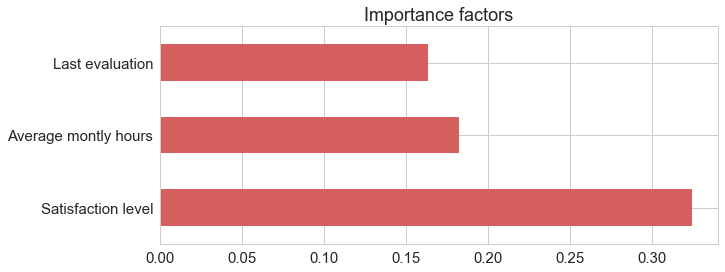

In [34]:
clf_id = 4 # 4 to run the gradient boosted regression trees
classifierz(clf_id)

Random forest and gradient boosted algorithms are both ensemble learning algorithms that
combine multiple decision trees to create more powerful models.
They performed exceptionally well on this dataset. Not only the accuracy but also the precision and the recall metrics are quite high with these models.
The three most important features, extracted from the data using the gradient boosted algorithm, are:
* Satisfaction level
* Average monthly hours
* Last evaluation

## 5. Predict who will leave the company

In [35]:
#Predict who will leave with a probability greater than or equal to 50%
rfc = rfc(n_estimators=10)
Mr_x = cross_val_predict(rfc, X, y, cv=5,
                         method='predict_proba')
Mr_x = pd.DataFrame(Mr_x[0:,1])
Mr_x.columns = ['prob_leaving']


In [36]:
Mr_x_prob= pd.concat([df, Mr_x], axis=1)
Mr_x_prob= Mr_x_prob[(Mr_x_prob["Left"] == 0)]
Mr_x_prob= Mr_x_prob[(Mr_x_prob["prob_leaving"] >= 0.49)]
Mr_x_prob.sort_values(by='prob_leaving', ascending=False, inplace=True)

In [37]:
wl = Mr_x_prob[['Number_project','Average_montly_hours',
                 'Time_spend_company', 'Work_accident',
                 'Salary','prob_leaving']]

In [38]:
wl.style.bar(subset=['prob_leaving'], color='#d65f5f')

### 6.Conclusion
By using machine learning algorithms, we were able to extract the main factors related to the intention to leave and the decision to resign, we were also able to calculate the probability of leaving for current employees.
This model can be still improved by using chronological data and adding more features like age, gender, family status, distance to work etc.


